# Data Insight

This notebook primarily inspects the different datasets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import lib

## ToolE

[Github](https://github.com/HowieHwong/MetaTool)

This dataset contains various types of user queries in the form of prompts that trigger LLMs to use tools, including both single-tool and multi-tool scenarios.

**Dataset statistics**

<center>

| Generation method              | Model                          | Sample number                                         |
|--------------------------------|--------------------------------|-------------------------------------------------------|
| Direct generation              | ChatGPT, GPT-4                 | 11,700                                                |
| Emotional generation           | ChatGPT                        | 7,800                                                 |
| Keyword generation             | ChatGPT                        | 1,950                                                 |
| Details generation             | ChatGPT                        | 7,800                                                 |
| Multi-tool generation          | ChatGPT, GPT-4                 | 1,624                                                 |
| After checking                 | \                              | 21,127 (20,630 single-tool + 497 multi-tool)          |

</center>

**Dataset files**

- Single-tool data: `dataset/data/all_clean_data.csv`
- Multi-tool data: `dataset/data/multi_tool_query_golden.json`
- All tool description: `dataset/plugin_des.json`
- meta data from OpenAI plugin store: `dataset/plugin_info.json`
- Merged data description: `dataset/big_tool_des.json`
- Embedding of tool description: `dataset/tool_embedding.pkl`
- Scenario tool list (Table 10 in the paper): `dataset/scenario`


**Tool Embedding**

We utilize the text-embedding-ada-002 mode

OpenAI. new-and-improved-embedding-model, 2023c. https://openai.com/blog/new-and-improved-embedding-model.

In [3]:
tool_e = lib.data.Datasets.ToolE()

In [4]:
print(f"Single Tool Data, shape: {tool_e.single_tool.shape}")
tool_e.single_tool

Single Tool Data, shape: (20614, 2)


Query               Tool
0      Can I find academic research papers on this to...     ResearchHelper
1                   Can I find any peer-reviewed papers?     ResearchHelper
2                  Can I generate bibtex bibliographies?     ResearchHelper
3                       Can I use Crossref with Chatbot?     ResearchHelper
4      Can you answer a question about a research pap...     ResearchHelper
...                                                  ...                ...
20609  I seem to have lost track of everything I've p...  ShoppingAssistant
20610  Is there a way to make my online shopping more...  ShoppingAssistant
20611  I would like a better system to handle my onli...  ShoppingAssistant
20612  I'm overwhelmed by the number of items in my c...  ShoppingAssistant
20613  I've been doing a lot of online shopping and i...  ShoppingAssistant

[20614 rows x 2 columns]

In [5]:
print(f"Multi Tool Data, shape: {tool_e.multi_tool.shape}")
tool_e.multi_tool

Multi Tool Data, shape: (497, 2)


query  \
0    I want to know the latest news about Tesla and...   
1    Please provide me with the current stock price...   
2    Can you give me an overview of the top trendin...   
3    I need to analyze the financial performance of...   
4    How can I invest my savings wisely and also le...   
..                                                 ...   
492  "I'm planning to purchase a new phone but I'm ...   
493  "Can you find me a discounted laptop with good...   
494  "I need a new smartphone with a large screen. ...   
495  "I'm looking for a new pair of running shoes. ...   
496  "Can you show me discounted dresses that would...   

                           tool  
0       [FinanceTool, NewsTool]  
1       [FinanceTool, NewsTool]  
2       [FinanceTool, NewsTool]  
3       [FinanceTool, NewsTool]  
4     [FinanceTool, CourseTool]  
..                          ...  
492  [Discount, ResearchHelper]  
493   [Discount, ProductSearch]  
494   [Discount, ProductSearch]  
495   [Discount, ProductSearch]  
496   [Discount, ProductSearch]  

[497 rows x 2 columns]

In [6]:
print(f"Tool Descriptions, shape: {tool_e.descriptions.shape}")
tool_e.descriptions

Tool Descriptions, shape: (199, 2)


tool                                        description
0             timeport  Begin an exciting journey through time, intera...
1    airqualityforeast  Planning something outdoors? Get the 2-day air...
2              copilot  Searches every dealer, analyzes & ranks every ...
3                 tira  Shop Tira for top beauty brands! Explore cosme...
4           calculator  A calculator app that executes a given formula...
..                 ...                                                ...
194      ProductSearch  Find products tailored to your preferences wit...
195           Discount  Discover discounts and coupon codes to save mo...
196             Review  Analyze and summarize reviews, providing advan...
197  ProductComparison  Compare multiple product options for informed ...
198  ShoppingAssistant  Manage your cart, and display QR code for easy...

[199 rows x 2 columns]

In [7]:
print(f"OpenAI Meta Data, shape: {tool_e.openai_meta_data.shape}")
tool_e.openai_meta_data

OpenAI Meta Data, shape: (390, 4)


name_for_model      name_for_human  \
0                         vio_com             Vio.com   
1                        timeport            Timeport   
2    Singapore_Places_Of_Interest      SG Places Beta   
3               airqualityforeast  Gimmee Air Quality   
4                      deepmemory         Deep Memory   
..                            ...                 ...   
385                        Zapier              Zapier   
386                       expedia             Expedia   
387                     Instacart           Instacart   
388                KlarnaProducts     Klarna Shopping   
389                         KAYAK               KAYAK   

                                 description_for_model  \
0    Search for hotels or other accommodations in a...   
1    An entertaining and educational time-travel ga...   
2    Provides information on attractions, F&B outle...   
3    Planning something outdoors? Get the 2-day air...   
4    Create as many flashcards as possible from the...   
..                                                 ...   
385  Zapier can talk to any of 20k+ actions the use...   
386  You are a travel assistant that ALWAYS uses Ex...   
387  The Instacart plugin can be used to create a s...   
388  Assistant uses the Klarna plugin to get releva...   
389  Search flights, stays & rental cars or get rec...   

                                 description_for_human  
0    A better deal on your next hotel, motel or acc...  
1    Begin an exciting journey through time, intera...  
2    Provides information on attractions, F&B outle...  
3    Planning something outdoors? Get the 2-day air...  
4    Create flashcards and review them on Deep Memo...  
..                                                 ...  
385  Interact with over 5,000+ apps like Google She...  
386  Bring your trip plans to life – get there, sta...  
387  What’s cookin'? Ask about recipes, meal plans,...  
388  Search and compare prices from thousands of on...  
389  Search flights, stays & rental cars or get rec...  

[390 rows x 4 columns]

In [8]:
print(f"Merged Data Descriptions, shape: {tool_e.merged_descriptions.shape}")
tool_e.merged_descriptions

Merged Data Descriptions, shape: (47, 2)


tool                                        description
0             FinanceTool  Stay informed with the latest financial update...
1            ExchangeTool  Seamlessly convert currencies with our integra...
2                NewsTool  Stay connected to global events with our up-to...
3              PolishTool  Elevate your content with our AI-powered tool,...
4             CharityTool  Empower your charitable endeavors by accessing...
5                 MapTool  Experience the next level of map navigation wi...
6              CourseTool  Unlock a world of knowledge and growth with ou...
7       DataRetrievalTool  An tool that expands memory. It stores and ret...
8            StrologyTool                 Povides strology services for you.
9               NotesTool  A full-featured reminder and to-do list manage...
10             MemoryTool  A learning application with spaced repetition ...
11                LawTool  Enables quick search functionality for relevan...
12              ChartTool  A versatile chart and diagram tool that can cr...
13         EarthquakeTool  Provides real-time earthquake notifications an...
14               NASATool  A platform for exploring space, allowing users...
15        CompanyInfoTool  Obtain relevant information about global compa...
16             ResumeTool  Quickly create resumes and receive feedback on...
17               MemeTool                                      Create memes.
18               GiftTool            Provide suggestions for gift selection.
19            PDF&URLTool  Interact with any PDF files, provide page refe...
20     VideoSummarizeTool  enerate summaries from YouTube video links, of...
21        MediaModifyTool  A versatile image editing application with a v...
22               DietTool  A tool that simplifies calorie counting, track...
23            WebsiteTool  Quickly create and deploy websites, and publis...
24                URLTool  Provide domain and URL information and assist ...
25               TripTool  Offer discounted hotel and accommodation booki...
26         TripAdviceTool  A comprehensive travel assistantn that makes t...
27               BookTool  AI-powered personalized book recommendations, ...
28              MediaTool  Your media and entertainment companion, offeri...
29            PodcastTool   Search for podcasts and summarize their content.
30              MusicTool  Create music playlists, search for music, and ...
31               GameTool  Get game-related information and recommend games.
32            WeatherTool   Provide you with the latest weather information.
33  RestaurantBookingTool                        Tool for booking restaurant
34                  local  Discover and support restaurants, shops & serv...
35       HouseRentingTool  Tool that provide all sorts of information abo...
36    HousePurchasingTool  Tool that provide all sorts of information abo...
37                JobTool  Your Global Career Hub! Find diverse job oppor...
38               RepoTool  Discover GitHub projects tailored to your need...
39         ResearchFinder                Tool for searching academic papers.
40         ResearchHelper  Tool that offers additional functions beyond s...
41                SEOTool  Tool that provides users with SEO analytics co...
42          ProductSearch  Find products tailored to your preferences wit...
43               Discount  Discover discounts and coupon codes to save mo...
44                 Review  Analyze and summarize reviews, providing advan...
45      ProductComparison  Compare multiple product options for informed ...
46      ShoppingAssistant  Manage your cart, and display QR code for easy...

In [9]:
print(f"Embeddings, shape: {len(tool_e.embeddings)}, embedding size: {len(tool_e.embeddings.iloc[0]['embedding'])}")
tool_e.embeddings

Embeddings, shape: 201, embedding size: 1536


tool                                          embedding
0             timeport  [-0.002328580478206277, -0.025154519826173782,...
1    airqualityforeast  [0.0024755524937063456, 0.001670109573751688, ...
2              copilot  [-0.013786195777356625, 0.011559398844838142, ...
3                 tira  [-0.0014366412069648504, -0.004678442142903805...
4           calculator  [-0.005550655536353588, 0.014075472950935364, ...
..                 ...                                                ...
196      ProductSearch  [-0.005632997956126928, -0.0036043194122612476...
197           Discount  [-0.004393497947603464, -0.007214654237031937,...
198             Review  [-0.00655797915533185, 0.011819069273769855, 0...
199  ProductComparison  [0.0017105531878769398, -0.007732874248176813,...
200  ShoppingAssistant  [-0.002391294576227665, 0.01946019008755684, 0...

[201 rows x 2 columns]

## ToolLens

[Papers with code](https://paperswithcode.com/dataset/toollens)

[HuggingFace](https://huggingface.co/datasets/stuedu/ToolLens)

In [10]:
tool_lens = lib.data.Datasets.ToolLens()

In [11]:
print(f"Train Data, shape: {tool_lens.train.shape}")
tool_lens.train

Train Data, shape: (45035, 3)


query-id  corpus-id  score
0         18674          0      1
1         18674          1      1
2         18674          2      1
3         13239          0      1
4         13239          1      1
...         ...        ...    ...
45030      1626         33      1
45031      1626        144      1
45032     15859        307      1
45033     15859         33      1
45034     15859        144      1

[45035 rows x 3 columns]

In [12]:
print(f"Test Data, shape: {tool_lens.test.shape}")
tool_lens.test

Test Data, shape: (5010, 3)


query-id  corpus-id  score
0         1084          0      1
1         1084          1      1
2         1084          2      1
3        16689          0      1
4        16689          1      1
...        ...        ...    ...
5005     11195         33      1
5006     11195        144      1
5007     15442        307      1
5008     15442         33      1
5009     15442        144      1

[5010 rows x 3 columns]

In [13]:
print(f"Corpus Data, shape: {tool_lens.corpus.shape}")
tool_lens.corpus

Corpus Data, shape: (464, 4)


_id title                                               text metadata
0      0        category_name:Food, tool_name:Worldwide Recipe...       {}
1      1        category_name:Food, tool_name:Nutrition by API...       {}
2      2        category_name:Food, tool_name:Store Groceries,...       {}
3      3        category_name:Finance, tool_name:Real-Time Fin...       {}
4      4        category_name:Finance, tool_name:Metals Prices...       {}
..   ...   ...                                                ...      ...
459  459        category_name:Sports, tool_name:Bet-at-Home, a...       {}
460  460        category_name:eCommerce, tool_name:Ikea API, a...       {}
461  461        category_name:Finance, tool_name:Bitcoin News,...       {}
462  462        category_name:Business, tool_name:Business Sta...       {}
463  463        category_name:Location, tool_name:Reverse Geoc...       {}

[464 rows x 4 columns]

In [14]:
lib.data.print_data_example(tool_lens.corpus, 0)

Example index: 0:

_id:
0

title:


text:
category_name:Food, tool_name:Worldwide Recipes, api_name:Suggestions, api_description:Get Suggestions, required_params: [{"name": "q", "type": "STRING", "description": ""}], optional_params: [], return_schema: {"success": "bool", "message": "str", "results": {"ingredients": ["list of str with length 413"], "searches": ["list of str with length 10"]}}

metadata:
{}



In [15]:
print(f"Queries Data, shape: {tool_lens.queries.shape}")
tool_lens.queries

Queries Data, shape: (18770, 3)


_id                                               text metadata
0      18674  I'm planning a meal using the ingredient beef ...       {}
1      13239  I'm looking for dinner ideas using the ingredi...       {}
2      10855  I'm discovering recipes using the ingredient t...       {}
3      15051  I'm exploring vegan options using the ingredie...       {}
4      14920  I'm preparing quick snacks using the ingredien...       {}
...      ...                                                ...      ...
18765   5315  I am planning a merger and would like to searc...       {}
18766  16594  I am looking for arbitrage opportunities relat...       {}
18767   7939  I need to conduct a competitive analysis for t...       {}
18768   1626  I am managing treasury and would like to searc...       {}
18769  15859  I am researching financial journalism with a f...       {}

[18770 rows x 3 columns]

In [16]:
print(f"ToolLens Data, shape: {tool_lens.toollens.shape}")
tool_lens.toollens

ToolLens Data, shape: (18770, 2)


apis  \
0      [{'category_name': 'Food', 'tool_name': 'World...   
1      [{'category_name': 'Food', 'tool_name': 'World...   
2      [{'category_name': 'Food', 'tool_name': 'World...   
3      [{'category_name': 'Food', 'tool_name': 'World...   
4      [{'category_name': 'Food', 'tool_name': 'World...   
...                                                  ...   
18765  [{'category_name': 'Finance', 'tool_name': 'Hr...   
18766  [{'category_name': 'Finance', 'tool_name': 'Hr...   
18767  [{'category_name': 'Finance', 'tool_name': 'Hr...   
18768  [{'category_name': 'Finance', 'tool_name': 'Hr...   
18769  [{'category_name': 'Finance', 'tool_name': 'Hr...   

                                                   query  
0      I'm planning a meal using the ingredient beef ...  
1      I'm looking for dinner ideas using the ingredi...  
2      I'm discovering recipes using the ingredient t...  
3      I'm exploring vegan options using the ingredie...  
4      I'm preparing quick snacks using the ingredien...  
...                                                  ...  
18765  I am planning a merger and would like to searc...  
18766  I am looking for arbitrage opportunities relat...  
18767  I need to conduct a competitive analysis for t...  
18768  I am managing treasury and would like to searc...  
18769  I am researching financial journalism with a f...  

[18770 rows x 2 columns]

In [17]:
lib.data.print_data_example(tool_lens.toollens)

Example index: 0:

apis:
[{'category_name': 'Food', 'tool_name': 'Worldwide Recipes', 'api_name': 'Suggestions', 'api_description': 'Get Suggestions', 'required_parameters': [{'name': 'q', 'type': 'STRING', 'description': '', 'default': 'chicken'}], 'optional_parameters': [], 'method': 'GET', 'template_response': {'success': 'bool', 'message': 'str', 'results': {'ingredients': ['list of str with length 413'], 'searches': ['list of str with length 10']}}}, {'category_name': 'Food', 'tool_name': 'Nutrition by API-Ninjas', 'api_name': '/v1/nutrition', 'api_description': 'API Ninjas Nutrition API endpoint.', 'required_parameters': [{'name': 'query', 'type': 'STRING', 'description': 'Query text to extract nutrition information (e.g. **bacon and 3 eggs**).', 'default': '1lb brisket with fries'}], 'optional_parameters': [], 'method': 'GET', 'template_response': {'name': 'str', 'calories': 'float', 'serving_size_g': 'float', 'fat_total_g': 'float', 'fat_saturated_g': 'float', 'protein_g': 'flo

## Berkeley Function Calling Leaderboard 

- [Official site](https://gorilla.cs.berkeley.edu/blogs/8_berkeley_function_calling_leaderboard.html)
- [Hugging Face](https://huggingface.co/datasets/gorilla-llm/Berkeley-Function-Calling-Leaderboard)

In [18]:
berkeley = lib.data.Datasets.Berkeley()

In [19]:
berkeley.simple

id                                           question  \
0      simple_0  [[{'role': 'user', 'content': 'Find the area o...   
1      simple_1  [[{'role': 'user', 'content': 'Calculate the f...   
2      simple_2  [[{'role': 'user', 'content': 'Calculate the h...   
3      simple_3  [[{'role': 'user', 'content': 'Find the roots ...   
4      simple_4  [[{'role': 'user', 'content': 'Solve a quadrat...   
..          ...                                                ...   
395  simple_395  [[{'role': 'user', 'content': 'Find the neares...   
396  simple_396  [[{'role': 'user', 'content': 'Find a hospital...   
397  simple_397  [[{'role': 'user', 'content': 'Find the distan...   
398  simple_398  [[{'role': 'user', 'content': 'What are the op...   
399  simple_399  [[{'role': 'user', 'content': 'Find me the bes...   

                                              function  
0    [{'name': 'calculate_triangle_area', 'descript...  
1    [{'name': 'math.factorial', 'description': 'Ca...  
2    [{'name': 'math.hypot', 'description': 'Calcul...  
3    [{'name': 'algebra.quadratic_roots', 'descript...  
4    [{'name': 'solve_quadratic_equation', 'descrip...  
..                                                 ...  
395  [{'name': 'parking_lot.find_nearest', 'descrip...  
396  [{'name': 'hospital.locate', 'description': 'L...  
397  [{'name': 'distance_calculator.calculate', 'de...  
398  [{'name': 'get_museum_hours', 'description': '...  
399  [{'name': 'restaurant_search', 'description': ...  

[400 rows x 3 columns]

In [20]:
berkeley.multiple

id                                           question  \
0      multiple_0  [[{'role': 'user', 'content': 'Can I find the ...   
1      multiple_1  [[{'role': 'user', 'content': 'Calculate the a...   
2      multiple_2  [[{'role': 'user', 'content': 'What is the cap...   
3      multiple_3  [[{'role': 'user', 'content': 'Compute the Euc...   
4      multiple_4  [[{'role': 'user', 'content': 'Can you calcula...   
..            ...                                                ...   
195  multiple_195  [[{'role': 'user', 'content': 'Calculate the h...   
196  multiple_196  [[{'role': 'user', 'content': 'What are the na...   
197  multiple_197  [[{'role': 'user', 'content': 'Find the type o...   
198  multiple_198  [[{'role': 'user', 'content': 'What is the gen...   
199  multiple_199  [[{'role': 'user', 'content': 'Predict the gro...   

                                              function  
0    [{'name': 'triangle_properties.get', 'descript...  
1    [{'name': 'math.triangle_area_heron', 'descrip...  
2    [{'name': 'country_info.largest_city', 'descri...  
3    [{'name': 'EuclideanDistance.calculate', 'desc...  
4    [{'name': 'kinematics.calculate_displacement',...  
..                                                 ...  
195  [{'name': 'get_lawsuit_details', 'description'...  
196  [{'name': 'locate_tallest_mountains', 'descrip...  
197  [{'name': 'create_player_profile', 'descriptio...  
198  [{'name': 'calculate_genotype_frequency', 'des...  
199  [{'name': 'forest_growth_forecast', 'descripti...  

[200 rows x 3 columns]

## Reverse-chain

[Paper](https://aclanthology.org/2024.findings-naacl.22/)

[Data](https://github.com/zhangyingerjelly/reverse-chain/blob/main/README.md)

In [21]:
reverse_chain = lib.data.Datasets.ReverseChain()

In [22]:
print(f"Reverse Chain Data, shape: {reverse_chain.data.shape}")
reverse_chain.data

Reverse Chain Data, shape: (1550, 3)


APIs  \
Index                                                      
0      [{'name': 'UserName2ID', 'Description': 'This ...   
1      [{'name': 'UserName2ID', 'Description': 'This ...   
2      [{'name': 'UserName2ID', 'Description': 'This ...   
3      [{'name': 'UserName2ID', 'Description': 'This ...   
4      [{'name': 'UserName2ID', 'Description': 'This ...   
...                                                  ...   
1545   [{'name': 'FindRestaurantByCuisine', 'Descript...   
1546   [{'name': 'Username2ID', 'Description': 'This ...   
1547   [{'name': 'Username2ID', 'Description': 'This ...   
1548   [{'name': 'BookMovie', 'Description': 'This AP...   
1549   [{'name': 'BookMovie', 'Description': 'This AP...   

                                                   Query  \
Index                                                      
0      Can you add the song 'Imagine' by John Lennon ...   
1      I would like to see 'Billie Jean' included in ...   
2      Would you mind including 'Dancing Queen' in To...   
3      Could you edit Sophia's 'Jazz Legends' playlis...   
4      Is there a way to incorporate the song 'space ...   
...                                                  ...   
1545   Hello, I am Emma. Can you reserve a spot for m...   
1546   I'm logged in as 'lisa', can you play a track ...   
1547   I'm signed in as 'mia', can you play a song th...   
1548   Can you give the weather conditions for the lo...   
1549   Can you give the weather conditions for the lo...   

                                                   Label  
Index                                                     
0      AddSongToPlaylist(user_ID=UserName2ID(user_nam...  
1      AddSongToPlaylist(user_ID=UserName2ID(user_nam...  
2      AddSongToPlaylist(user_ID=UserName2ID(user_nam...  
3      AddSongToPlaylist(user_ID=UserName2ID(user_nam...  
4      AddSongToPlaylist(user_ID=UserName2ID(user_nam...  
...                                                  ...  
1545   BookRestaurantTable(restaurant_ID=FindRestaura...  
1546   PlaySong(song_title=RecommendSong(playlist=Fet...  
1547   PlaySong(song_title=RecommendSong(playlist=Fet...  
1548   GetWeather(location=BookMovie(title=GetUserPre...  
1549   GetWeather(location=BookMovie(title=GetUserPre...  

[1550 rows x 3 columns]

In [23]:
lib.data.print_data_example(reverse_chain.data,1)

Example index: 1:

APIs:
[{'name': 'UserName2ID', 'Description': 'This API is to convert a username to a user ID.', 'input_params': {'user_name': {'description': 'the name of the user', 'type': 'String'}}, 'output_params': {'user_ID': {'description': 'the ID of the user', 'type': 'Integer'}}, 'format': 'UserName2ID(user_name) -> user_ID'}, {'name': 'PlaylistName2ID', 'Description': 'This API is to convert a playlist name to a playlist ID.', 'input_params': {'playlist_name': {'description': 'the name of the playlist', 'type': 'String'}}, 'output_params': {'playlist_ID': {'description': 'the ID of the playlist', 'type': 'Integer'}}, 'format': 'PlaylistName2ID(playlist_name) -> playlist_ID'}, {'name': 'AddSongToPlaylist', 'Description': 'This API is to add a song to a playlist.', 'input_params': {'user_ID': {'description': 'the ID of the user', 'type': 'Integer'}, 'playlist_ID': {'description': 'the ID of the playlist', 'type': 'Integer'}, 'song_name': {'description': 'the name of the son

## Main dataset

This dataset is a combination of the above datasets.

See [data_collector.ipynb](./data_collector.ipynb) notebook for the generation of this dataset

In [24]:
main_dataset = lib.data.Datasets.Main()

### Inspection

#### Queries

In [25]:
main_dataset.queries

query  \
0      Can I find academic research papers on this to...   
1                   Can I find any peer-reviewed papers?   
2                  Can I generate bibtex bibliographies?   
3                       Can I use Crossref with Chatbot?   
4      Can you answer a question about a research pap...   
...                                                  ...   
42387  Use a tool (or multiple if needed) to assist w...   
42388  Use a tool (or multiple if needed) to assist w...   
42389  Use a tool (or multiple if needed) to assist w...   
42390  Use a tool (or multiple if needed) to assist w...   
42391  Use a tool (or multiple if needed) to assist w...   

                                                    tool    source  
0                               [tool_e.research_helper]     ToolE  
1                               [tool_e.research_helper]     ToolE  
2                               [tool_e.research_helper]     ToolE  
3                               [tool_e.research_helper]     ToolE  
4                               [tool_e.research_helper]     ToolE  
...                                                  ...       ...  
42387  [berkeley.currency_exchange_convert, berkeley....  Berkeley  
42388  [berkeley.park_information, berkeley.legal_cas...  Berkeley  
42389  [berkeley.grocery_store_find_best, berkeley.ca...  Berkeley  
42390  [berkeley.sentiment_analysis, berkeley.psych_r...  Berkeley  
42391  [berkeley.forest_growth_forecast, berkeley.db_...  Berkeley  

[42392 rows x 3 columns]

In [26]:
main_dataset.queries['tool_count'] = main_dataset.queries['tool'].apply(len)
df_queries_source_groups = (
    main_dataset.queries[['tool_count', 'source']]
    .groupby(['tool_count', 'source'])
    .size()
    .unstack(fill_value=0)
)
df_queries_source_groups

source      Berkeley  ReverseChain  TEval  ToolE  ToolLens
tool_count                                                
1                400             0    461  20614      1617
2                 51           263      0    497      3031
3                 48          1129      0      0     14122
4                  1           149      0      0         0
5                  0             9      0      0         0

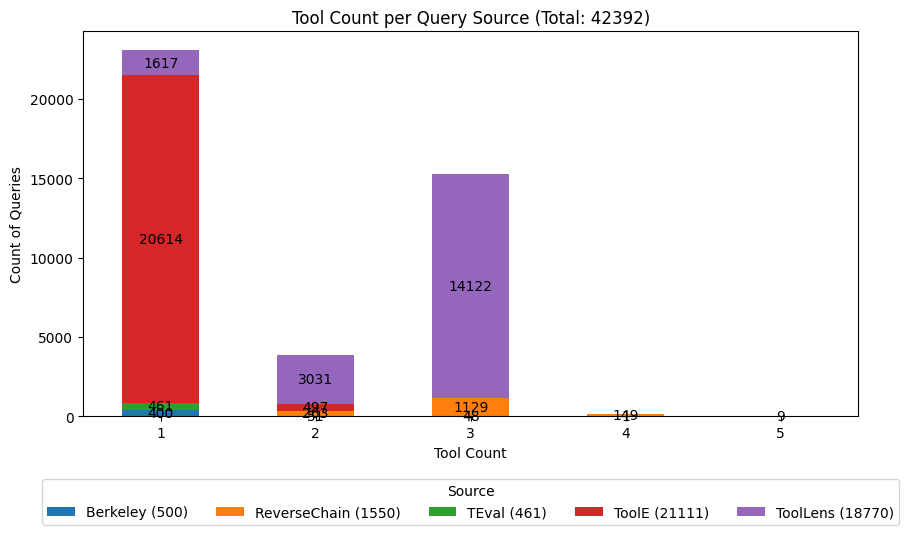

In [27]:
ax: plt.Axes = df_queries_source_groups.plot.bar(figsize=(10, 5), rot=0, stacked=True)
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt=lambda x: f'{x:.0f}' if x > 0 else '', padding=0)

# Edit legend to show total count given that source
handles, labels = ax.get_legend_handles_labels()
for i, source in enumerate(df_queries_source_groups.columns):
    labels[i] = f'{source} ({df_queries_source_groups[source].sum()})'
ax.legend(handles, labels, title='Source', loc = 'lower center', bbox_to_anchor=(0.5, -0.3), ncol=5)

plt.xlabel("Tool Count")
plt.ylabel("Count of Queries")
plt.title(f"Tool Count per Query Source (Total: {main_dataset.queries.shape[0]})")
plt.show()

#### Tools

In [28]:
main_dataset.tool_descriptions

tool                  tool_name  \
0                        tool_e.timeport                   timeport   
1               tool_e.airqualityforeast          airqualityforeast   
2                         tool_e.copilot                    copilot   
3                            tool_e.tira                       tira   
4                      tool_e.calculator                 calculator   
...                                  ...                        ...   
2119                 berkeley.hotel_book                 hotel_book   
2120     berkeley.hotel_room_pricing_get     hotel_room_pricing_get   
2121     berkeley.car_rental_pricing_get     car_rental_pricing_get   
2122  berkeley.flight_ticket_pricing_get  flight_ticket_pricing_get   
2123    berkeley.grocery_store_find_best    grocery_store_find_best   

                                            description    source  \
0     Begin an exciting journey through time, intera...     ToolE   
1     Planning something outdoors? Get the 2-day air...     ToolE   
2     Searches every dealer, analyzes & ranks every ...     ToolE   
3     Shop Tira for top beauty brands! Explore cosme...     ToolE   
4     A calculator app that executes a given formula...     ToolE   
...                                                 ...       ...   
2119  Book a hotel room given the location, room typ...  Berkeley   
2120  Get pricing for a specific type of hotel room ...  Berkeley   
2121  Get pricing for a specific type of rental car ...  Berkeley   
2122  Get pricing for a specific type of flight tick...  Berkeley   
2123  Find the closest high-rated grocery stores bas...  Berkeley   

                                               metadata  
0                                   {'source': 'ToolE'}  
1                                   {'source': 'ToolE'}  
2                                   {'source': 'ToolE'}  
3                                   {'source': 'ToolE'}  
4                                   {'source': 'ToolE'}  
...                                                 ...  
2119  {'name': 'hotel.book', 'description': 'Book a ...  
2120  {'name': 'hotel_room_pricing.get', 'descriptio...  
2121  {'name': 'car_rental_pricing.get', 'descriptio...  
2122  {'name': 'flight_ticket_pricing.get', 'descrip...  
2123  {'name': 'grocery_store.find_best', 'descripti...  

[2124 rows x 5 columns]

In [29]:
main_dataset.tool_embeddings

tool  \
0                        tool_e.timeport   
1               tool_e.airqualityforeast   
2                         tool_e.copilot   
3                            tool_e.tira   
4                      tool_e.calculator   
...                                  ...   
2121                 berkeley.hotel_book   
2122     berkeley.hotel_room_pricing_get   
2123     berkeley.car_rental_pricing_get   
2124  berkeley.flight_ticket_pricing_get   
2125    berkeley.grocery_store_find_best   

                                              embedding  
0     [-0.002328580478206277, -0.025154519826173782,...  
1     [0.0024755524937063456, 0.001670109573751688, ...  
2     [-0.013786195777356625, 0.011559398844838142, ...  
3     [-0.0014366412069648504, -0.004678442142903805...  
4     [-0.005550655536353588, 0.014075472950935364, ...  
...                                                 ...  
2121  [0.016627123579382896, 0.003058888018131256, -...  
2122  [0.01577910967171192, 0.002552404534071684, 0....  
2123  [0.006298906169831753, -0.005386214703321457, ...  
2124  [0.005622945725917816, -0.005735338665544987, ...  
2125  [0.012536044232547283, -0.007589613553136587, ...  

[2126 rows x 2 columns]

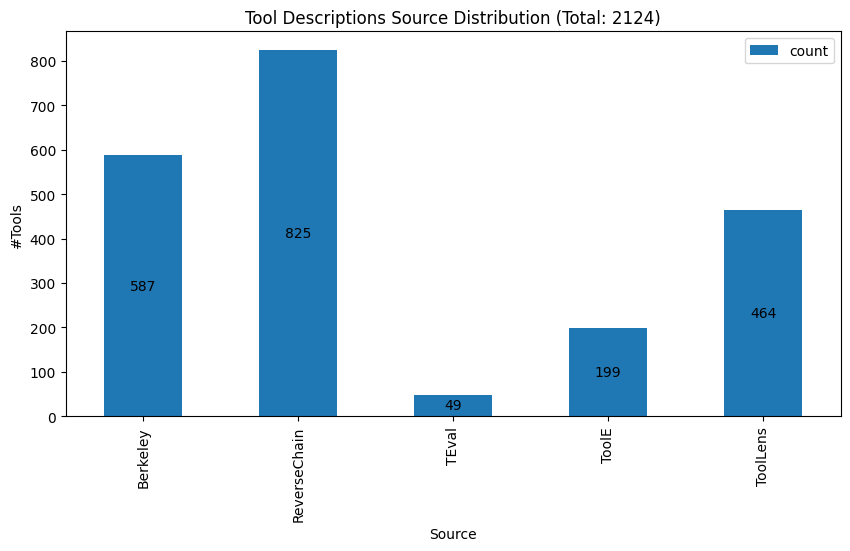

In [30]:
df_tool_source_groups = (
    main_dataset.tool_descriptions[['source']]
    .groupby(['source'])
    .size()
    .reset_index(name='count')
)

ax: plt.Axes = df_tool_source_groups.plot.bar(figsize=(10, 5), x='source', y='count')
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt=lambda x: f'{x:.0f}')
plt.title(f"Tool Descriptions Source Distribution (Total: {main_dataset.tool_descriptions.shape[0]})")
plt.xlabel("Source")
plt.ylabel("#Tools")
plt.show()

In [31]:
df_tool_dependency_source = 'ToolE'
# df_tool_dependency_source = 'ToolLens'
# df_tool_dependency_source = 'ReverseChain'

df_tool_dependency = main_dataset.queries[main_dataset.queries['source'] == df_tool_dependency_source].copy()[['tool','tool_count']]

co_occurrence = lib.data.ToolCoOccurrence.get_co_occurrence_dataframe(
    df_tool_dependency,
    use_only_multi_tool_use_cases= True,
)
co_occurrence

tool_e.course_tool  tool_e.discount  \
tool_e.course_tool                            82                7   
tool_e.discount                                7               72   
tool_e.finance_tool                            8                4   
tool_e.house_purchasing_tool                   8                8   
tool_e.job_tool                                7                3   
tool_e.music_tool                              8                6   
tool_e.news_tool                               8                7   
tool_e.p_d_f__u_r_l_tool                       8                3   
tool_e.product_search                          0                8   
tool_e.repo_tool                               7                0   
tool_e.research_finder                         6                0   
tool_e.research_helper                         1                3   
tool_e.trip_advice_tool                        5                7   
tool_e.trip_tool                               4                8   
tool_e.weather_tool                            5                8   

                              tool_e.finance_tool  \
tool_e.course_tool                              8   
tool_e.discount                                 4   
tool_e.finance_tool                            83   
tool_e.house_purchasing_tool                    7   
tool_e.job_tool                                 8   
tool_e.music_tool                               4   
tool_e.news_tool                                8   
tool_e.p_d_f__u_r_l_tool                        8   
tool_e.product_search                           4   
tool_e.repo_tool                                4   
tool_e.research_finder                          4   
tool_e.research_helper                          6   
tool_e.trip_advice_tool                         5   
tool_e.trip_tool                                5   
tool_e.weather_tool                             8   

                              tool_e.house_purchasing_tool  tool_e.job_tool  \
tool_e.course_tool                                       8                7   
tool_e.discount                                          8                3   
tool_e.finance_tool                                      7                8   
tool_e.house_purchasing_tool                            67                8   
tool_e.job_tool                                          8               65   
tool_e.music_tool                                        0                0   
tool_e.news_tool                                         8                8   
tool_e.p_d_f__u_r_l_tool                                 5                5   
tool_e.product_search                                    0                0   
tool_e.repo_tool                                         0                0   
tool_e.research_finder                                   6                4   
tool_e.research_helper                                   2                4   
tool_e.trip_advice_tool                                  4                8   
tool_e.trip_tool                                         3                4   
tool_e.weather_tool                                      8                6   

                              tool_e.music_tool  tool_e.news_tool  \
tool_e.course_tool                            8                 8   
tool_e.discount                               6                 7   
tool_e.finance_tool                           4                 8   
tool_e.house_purchasing_tool                  0                 8   
tool_e.job_tool                               0                 8   
tool_e.music_tool                            66                 8   
tool_e.news_tool                              8               100   
tool_e.p_d_f__u_r_l_tool                      6                 5   
tool_e.product_search                         3                 7   
tool_e.repo_tool                              0                 7   
tool_e.research_finder                        5     

In [32]:
lib.data.ToolCoOccurrence.subtract_k_from_tool_combination_from_co_occurrence(
    co_occurrence, 
    ['tool_lens.weather.weather_a_p_i_com.search__autocomplete__a_p_i',
     'tool_lens.travel.skyscanner_v2.search__place',
     'tool_lens.news__media.google__news__a_p_i.get_articles'],
    k=1
)

tool_e.course_tool  tool_e.discount  \
tool_e.course_tool                            82                7   
tool_e.discount                                7               72   
tool_e.finance_tool                            8                4   
tool_e.house_purchasing_tool                   8                8   
tool_e.job_tool                                7                3   
tool_e.music_tool                              8                6   
tool_e.news_tool                               8                7   
tool_e.p_d_f__u_r_l_tool                       8                3   
tool_e.product_search                          0                8   
tool_e.repo_tool                               7                0   
tool_e.research_finder                         6                0   
tool_e.research_helper                         1                3   
tool_e.trip_advice_tool                        5                7   
tool_e.trip_tool                               4                8   
tool_e.weather_tool                            5                8   

                              tool_e.finance_tool  \
tool_e.course_tool                              8   
tool_e.discount                                 4   
tool_e.finance_tool                            83   
tool_e.house_purchasing_tool                    7   
tool_e.job_tool                                 8   
tool_e.music_tool                               4   
tool_e.news_tool                                8   
tool_e.p_d_f__u_r_l_tool                        8   
tool_e.product_search                           4   
tool_e.repo_tool                                4   
tool_e.research_finder                          4   
tool_e.research_helper                          6   
tool_e.trip_advice_tool                         5   
tool_e.trip_tool                                5   
tool_e.weather_tool                             8   

                              tool_e.house_purchasing_tool  tool_e.job_tool  \
tool_e.course_tool                                       8                7   
tool_e.discount                                          8                3   
tool_e.finance_tool                                      7                8   
tool_e.house_purchasing_tool                            67                8   
tool_e.job_tool                                          8               65   
tool_e.music_tool                                        0                0   
tool_e.news_tool                                         8                8   
tool_e.p_d_f__u_r_l_tool                                 5                5   
tool_e.product_search                                    0                0   
tool_e.repo_tool                                         0                0   
tool_e.research_finder                                   6                4   
tool_e.research_helper                                   2                4   
tool_e.trip_advice_tool                                  4                8   
tool_e.trip_tool                                         3                4   
tool_e.weather_tool                                      8                6   

                              tool_e.music_tool  tool_e.news_tool  \
tool_e.course_tool                            8                 8   
tool_e.discount                               6                 7   
tool_e.finance_tool                           4                 8   
tool_e.house_purchasing_tool                  0                 8   
tool_e.job_tool                               0                 8   
tool_e.music_tool                            66                 8   
tool_e.news_tool                              8               100   
tool_e.p_d_f__u_r_l_tool                      6                 5   
tool_e.product_search                         3                 7   
tool_e.repo_tool                              0                 7   
tool_e.research_finder                        5     

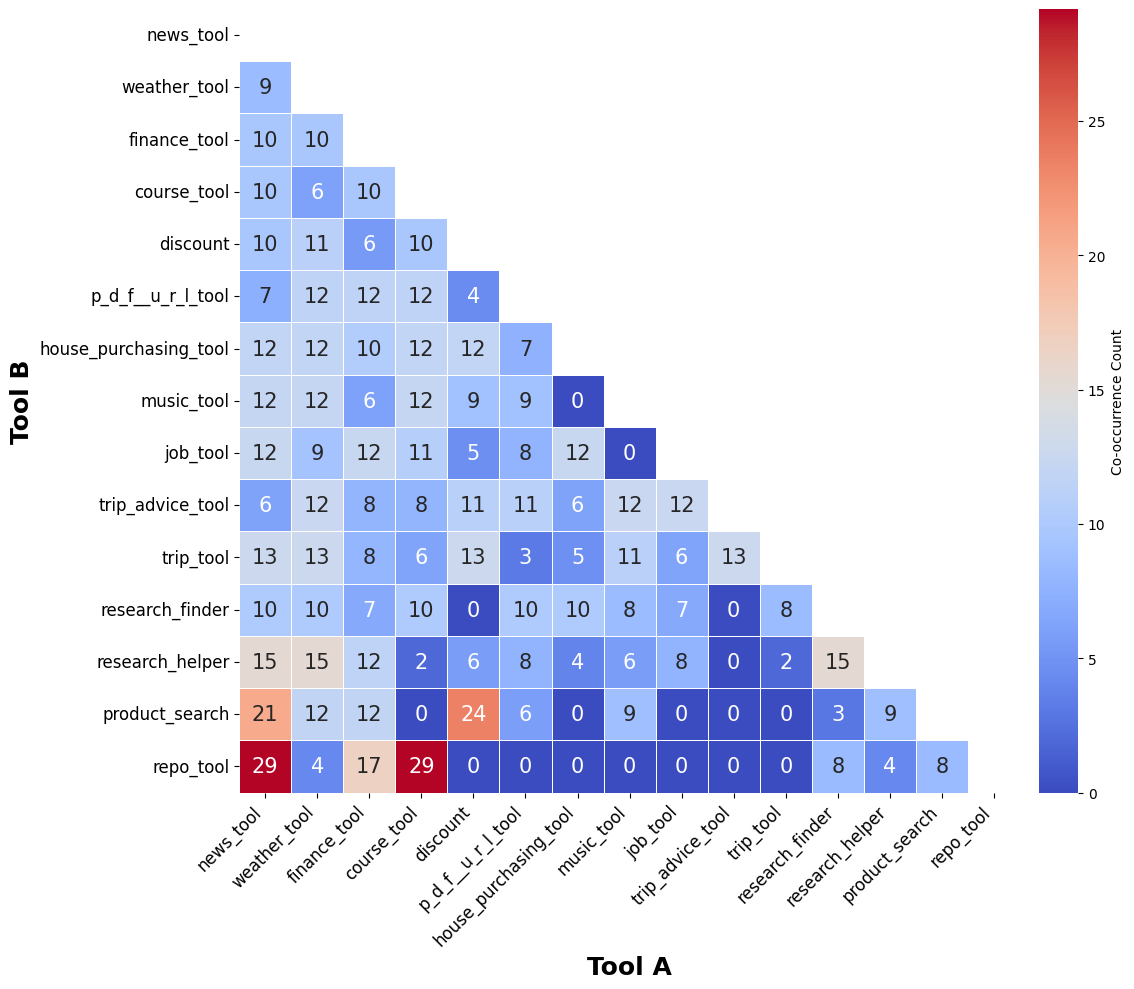

In [ ]:
# Visualize (co-occurrence heatmap)

# Make a copy of the co-occurrence matrix to avoid modifying the original
co_occurrence_plot = co_occurrence.copy()

# Replace NaN values with 0
co_occurrence_plot.fillna(0, inplace=True)

# Find top 20 used tools based on the sum of their co-occurrences
top_k = 15
top_tools: list[str] = co_occurrence_plot.sum().nlargest(top_k).index.tolist()
# Filter the co-occurrence matrix to only include the top 20 tools
co_occurrence_plot = co_occurrence_plot.loc[top_tools, top_tools]

# normalize the co-occurrence matrix
# co_occurrence_plot = co_occurrence_plot.div(co_occurrence_plot.sum(axis=1), axis=0) * 100  # Convert to percentage

# normalize the co-occurrence matrix by the diagonal
co_occurrence_plot = co_occurrence_plot.div(co_occurrence_plot.values.diagonal(), axis=0) * 100  # Convert to percentage


# Only keep the lower triangle of the matrix (optional)
include_diagonal = False # Set to True to include the diagonal
k = 0 if include_diagonal else -1  # k=0 keeps the diagonal, k=-1 excludes it
co_occurrence_plot = co_occurrence_plot.where(np.tril(np.ones(co_occurrence_plot.shape), k=k).astype(bool))

# Set the maximum value for the color scale
max_value = np.max(co_occurrence_plot.max())

# Set the style for the heatmap
# sns.set_theme(style='whitegrid')
# Set the figure size
plt.figure(figsize=(12, 10))
top_tools = [tool.split('.')[-1] for tool in top_tools]
sns.heatmap(co_occurrence_plot, xticklabels=top_tools, yticklabels=top_tools, 
            cmap='coolwarm', 
            annot=True, 
            fmt=".0f", 
            linewidths=0.5, 
            cbar=True,
            cbar_kws={
                "label": "Co-occurrence Count",
                "shrink": 1,
                "pad": 0.02,
                "aspect": 20,
                }, 
            vmin=0,
            vmax=max_value, 
            annot_kws={'size': 15}
            )
plt.title(f"Co-occurrence Heatmap of Tool Co-occurrences ({df_tool_dependency_source}, Top {top_k} used Tools)", size=18, fontweight='bold')
plt.xlabel("Tool A", fontsize=18, fontweight='bold')
plt.ylabel("Tool B", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
# make boxes bigger
# plt.gcf().set_size_inches(12, 10)
plt.tight_layout()
# plt.savefig(f"co_occurrence_heatmap_{df_tool_dependency_source}_top{top_k}.pdf", dpi=300, bbox_inches='tight')
plt.show()